In [11]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from collections import Counter

In [12]:
DATA_DIR = "data"
splits = ["train", "val", "test"]

In [13]:
def count_files(data_dir, split):
    images_path = os.path.join(data_dir, split, "images")
    labels_path = os.path.join(data_dir, split, "labels")
    
    num_images = len(os.listdir(images_path))
    num_labels = len(os.listdir(labels_path))
    
    return num_images, num_labels

In [14]:
for split in splits:
    num_images, num_labels = count_files(DATA_DIR, split)
    print(f"{split.upper()} SET:")
    print(f"  - Images: {num_images}")
    print(f"  - Labels: {num_labels}")
    print("-" * 30)

TRAIN SET:
  - Images: 14122
  - Labels: 14122
------------------------------
VAL SET:
  - Images: 3099
  - Labels: 3099
------------------------------
TEST SET:
  - Images: 4306
  - Labels: 4306
------------------------------


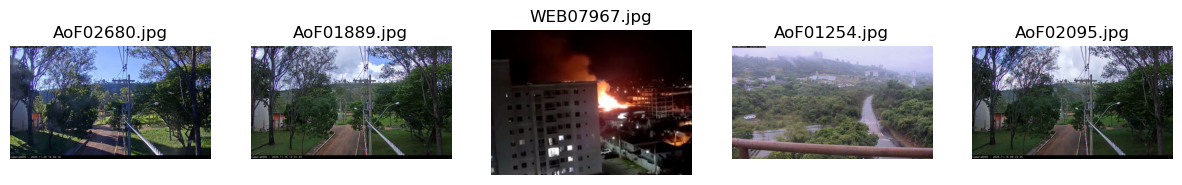

In [20]:
import random

# Display random sample images
def show_sample_images(data_dir, split, num_samples=5):
    images_path = os.path.join(data_dir, split, "images")
    
    image_files = os.listdir(images_path)
    if len(image_files) < num_samples:
        num_samples = len(image_files)  # Adjust if there are fewer images than requested
    
    random_images = random.sample(image_files, num_samples)  # Select random images
    
    plt.figure(figsize=(15, 5))
    
    for i, image_file in enumerate(random_images):
        image_path = os.path.join(images_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.axis("off")
        plt.title(image_file)
    
    plt.show()

# Show random sample images from the training set
show_sample_images(DATA_DIR, "train")

In [ ]:
def get_class_distribution(data_dir, split):
    labels_path = os.path.join(data_dir, split, "labels")
    
    class_counts = Counter()
    
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)
        with open(label_path, "r") as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1
                
    return class_counts

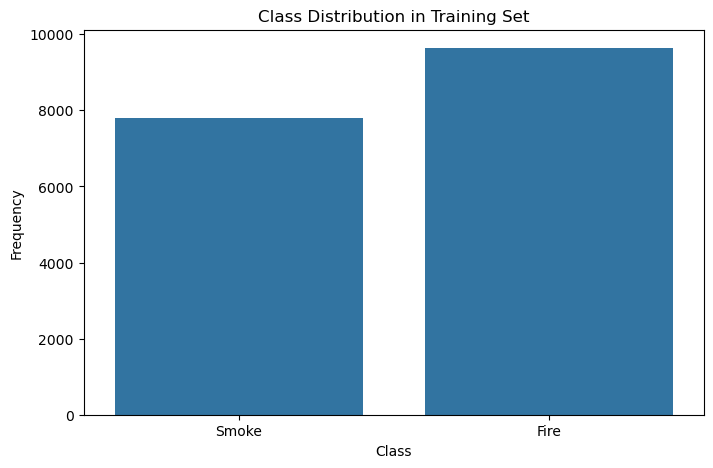

In [17]:
train_class_counts = get_class_distribution(DATA_DIR, "train")

# Plot class distribution
plt.figure(figsize=(8, 5))
class_labels = ["Smoke", "Fire"]
sns.barplot(x=class_labels, y=[train_class_counts[0], train_class_counts[1]])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Set")
plt.show()

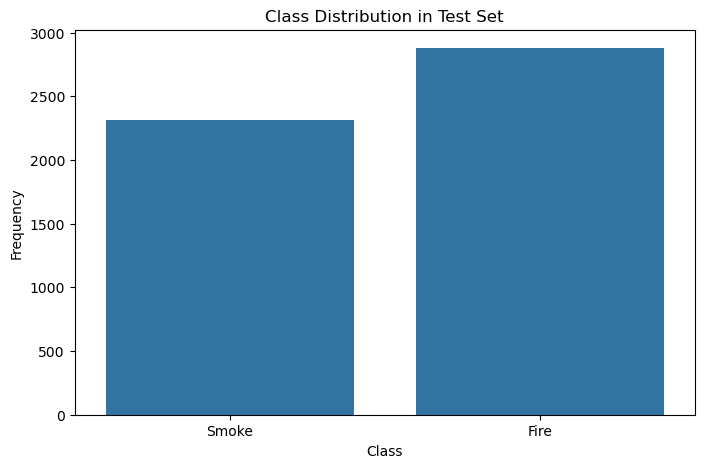

In [18]:
train_class_counts = get_class_distribution(DATA_DIR, "test")

# Plot class distribution
plt.figure(figsize=(8, 5))
class_labels = ["Smoke", "Fire"]
sns.barplot(x=class_labels, y=[train_class_counts[0], train_class_counts[1]])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in Test Set")
plt.show()

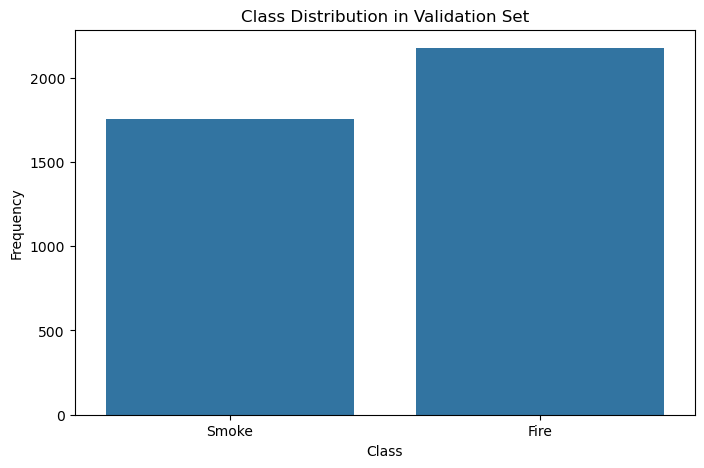

In [19]:
train_class_counts = get_class_distribution(DATA_DIR, "val")

# Plot class distribution
plt.figure(figsize=(8, 5))
class_labels = ["Smoke", "Fire"]
sns.barplot(x=class_labels, y=[train_class_counts[0], train_class_counts[1]])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in Validation Set")
plt.show()